In [ ]:
#https://www.youtube.com/watch?v=8ZZDNd4eyVI&t=1s&ab_channel=Mr.PSolver
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [51]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

In [52]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [53]:
the1 = the1(t)
the2 = the2(t)

In [54]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [55]:
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)

x2 = x1 + L2*smp.sin(the2)
y2 = y1 - L2*smp.cos(the2)

In [56]:
# Kinetic energy: it's 1/2mV^2 
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1 + T2

# potential energy
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

# lagrangian 
L = T-V



In [57]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify() 

In [58]:
# sympy.solve() assumes all [LE1, LE2, LE3, LE4] each are equal to zero
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=False, rational=False)

In [59]:
# we turned 4 second order differential equations into 8 first order differential equations (4 of them are just mou3amil) bcz sympy can't solve second orders, check a bit before 21:51 in video

dz1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2)
    ]

In [60]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=2
m2=1
L1=2
L2=1

ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g, m1, m2, L1, L2))

In [62]:
the1 = ans.T[0]
the2 = ans.T[2]

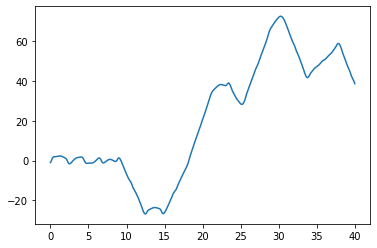

In [63]:
plt.plot(t, the2)

In [68]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    x1 = L1*np.sin(the1)
    y1 = -L1*np.cos(the1)

    x2 = x1 + L2*np.sin(the2)
    y2 = y1 - L2*np.cos(the2)
    return (x1, y1, x2, y2)

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

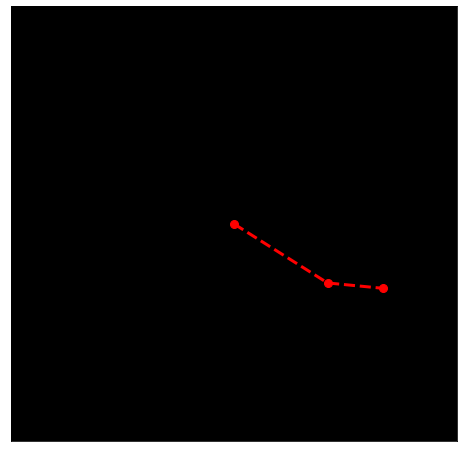

In [70]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([]) # hide x axis
ax.get_yaxis().set_ticks([]) # hide y axis

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
#ln2, = plt.plot([], [], 'ro-', lw=3, markersize=8, alpha=0.05, color='cyan')
#ln3, = plt.plot([], [], 'ro-', lw=3, markersize=8, alpha=0.05, color='cyan')
ax.set_ylim(-4, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif', writer='pillow', fps=25)